In [1]:
import  numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
%matplotlib inline
import warnings

In [2]:
col_names = ['Administrative','Administrative_Duration','Informational',
'Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates',
'ExitRates','PageValues','SpecialDay','Month', 'OperatingSystems','Browser','Region', 
'TrafficType','VisitorType','Weekend','Revenue'
]

In [3]:
#df_data_set = pd.read_csv('/Users/Willie/AirQualityUCI.csv', names=columns)
df=pd.read_csv("online header.csv", header=None,names=col_names)
df#= pd.get_dummies
df.info()
df.isna().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

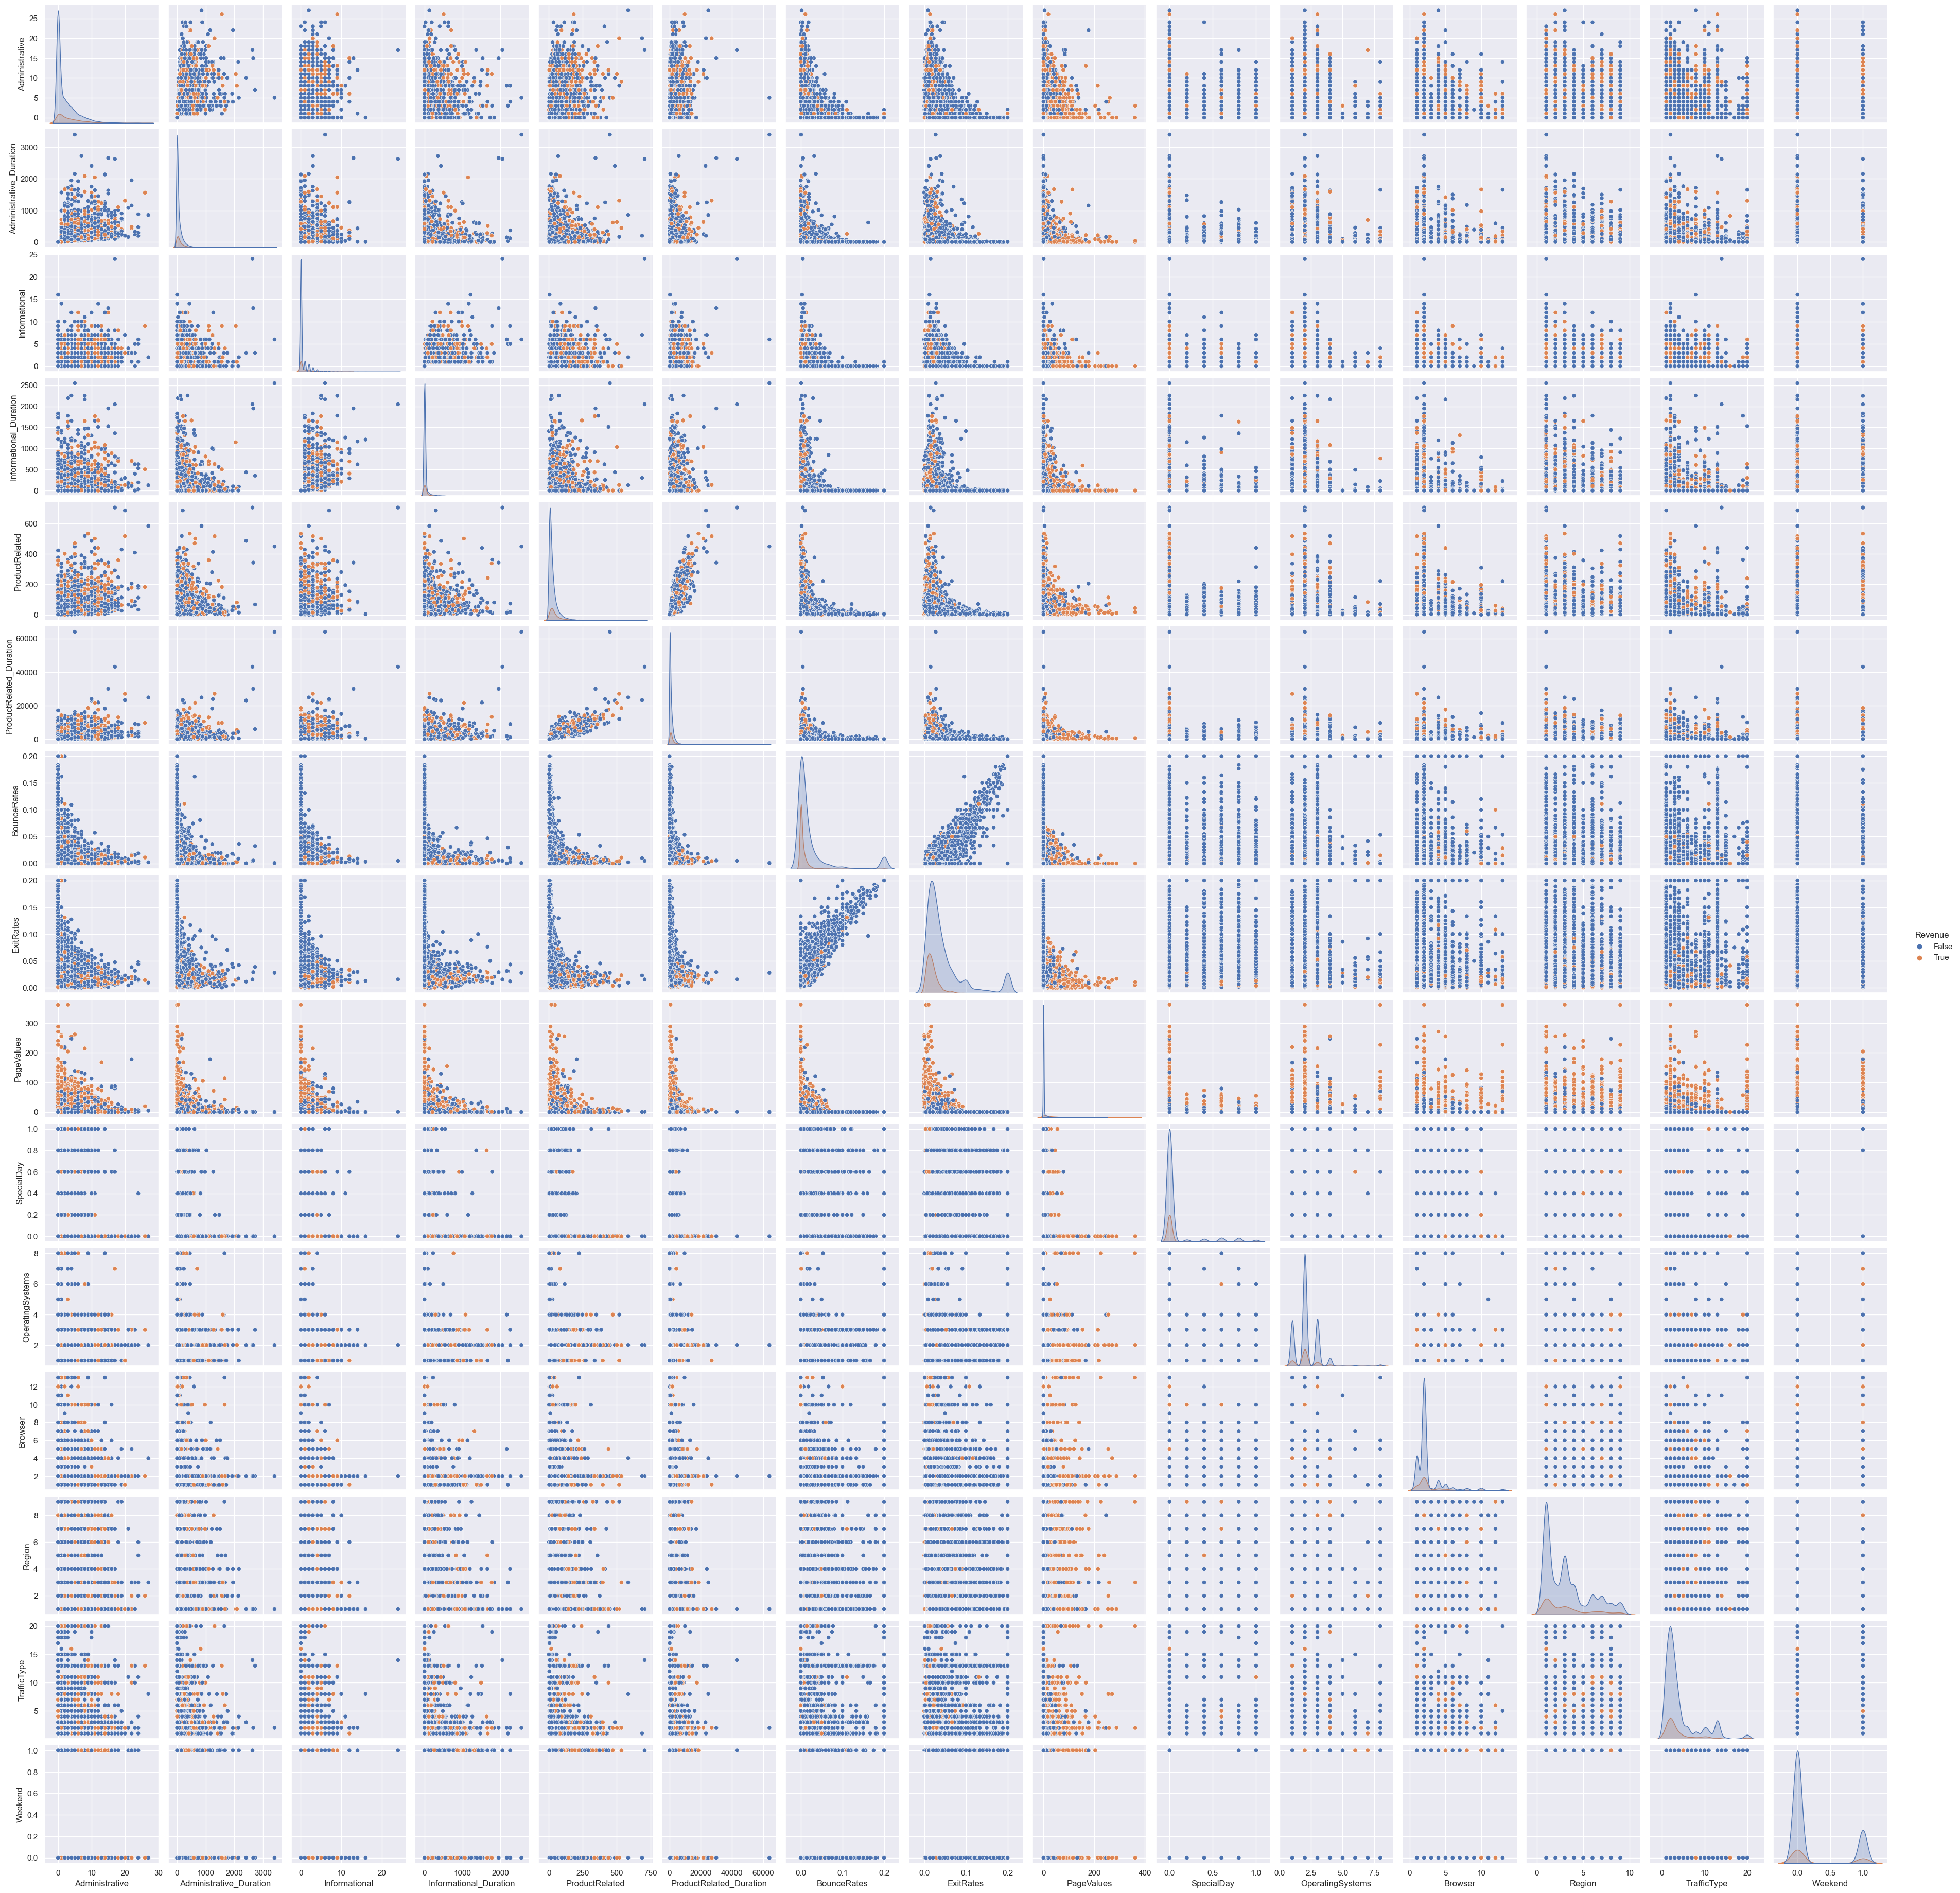

In [4]:
sns.pairplot(df,hue='Revenue')

In [6]:
df.describe(exclude='number')

Month        VisitorType Weekend Revenue
count   12330              12330   12330   12330
unique     10                  3       2       2
top       May  Returning_Visitor   False   False
freq     3364              10551    9462   10422

In [7]:
#df = pd.get_dummies(df)

In [8]:
# Take a look at the data after One Hot Encoding was applied
#pd.options.display.max_columns = None
#df.head()

In [5]:
dataframe = df.isnull()

In [9]:
df_nan_row = df.dropna(axis=0)

In [10]:
df_nan_col = df.dropna(axis=1)

In [11]:
df_isdup = df.duplicated()

In [12]:
#名目換成欄位
import calendar

onehotencoder = pd.get_dummies(df['Month'],prefix = 'Month' )
j= df['Month']
print(len(df['Month']))
#將Month裡面字串轉成數值
#M變數是串列的索引值為0，所以前面第一個為空值，為了要讓1月的索引值對到1
#不能使用calender是因為jun(六月)不是三個字元，原始資料是使用June
M = ['','Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
#for k in range(12):
   # print(list(calendar.month_abbr).index(M[k]))
df2 = df
for i in range (len(df['Month'])):
     df2['Month'][i]= list(M).index(j[i])


    

12330


C:\Users\sc121\AppData\Local\Temp\ipykernel_13824\2370214061.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'][i]= list(M).index(j[i])


In [13]:
df2

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0     2                 1   
1         0.000000   0.100000    0.000000         0.0     2                 2   
2         0.200000   0.200000    0.000000         0.0     2                 4   
3         0.050000   0.140000    0.000000         0.0     2                 3   
4         0.020000   0.050000    0.000000         0.0     2                 3   
...            ...        ...         ...         ...   ...               ...   
12325     0.007143   0.029031   12.241717         0.0    12                 4   
12326     0.000000   0.021333    0.000000         0.0    11                 3   
12327     0.083333   0.086667    0.000000         0.0    11                 3   
12328     0.000000   0.021053    0.000000         0.0    11                 2   
12329     0.000000   0.066667    0.000000         0.0    11                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0            1       1            1  Returning_Visitor    False    False  
1            2       1            2  Returning_Visitor    False    False  
2            1       9            3  Returning_Visitor    False    False  
3            2       2            4  Returning_Visitor    False    False  
4            3       1            4  Returning_Visitor     True    False  
...        ...     ...          ...                ...      ...      ...  
12325        6       1            1  Returning_Visitor     True    False  
12326        2       1            8  Returning_Visitor     True    False  
12327        2       1           13  Returning_Visitor     True    False  
12328        2       3           11  Returning_Visitor    False    False  
12329        2       1            2        New_Visitor     True    False  

[12330 rows x 18 columns]

In [ ]:
#onehotencoder

In [ ]:
#丟掉原本資料表裡面的名目
#df2 = df.drop ('Month',1)

In [ ]:
#df2

In [ ]:
#把資料表結合
#df2 = pd.concat([df2 , onehotencoder],axis = 1)

In [ ]:
#df2

In [14]:
VisitorTypeoh = pd.get_dummies(df2['VisitorType'],prefix = 'VisitorType' )
df3 = df2.drop ('VisitorType',1)
df4 = pd.concat([df3 , VisitorTypeoh],axis = 1)
df4

C:\Users\sc121\AppData\Local\Temp\ipykernel_13824\662747498.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df3 = df2.drop ('VisitorType',1)


Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0     2                 1   
1         0.000000   0.100000    0.000000         0.0     2                 2   
2         0.200000   0.200000    0.000000         0.0     2                 4   
3         0.050000   0.140000    0.000000         0.0     2                 3   
4         0.020000   0.050000    0.000000         0.0     2                 3   
...            ...        ...         ...         ...   ...               ...   
12325     0.007143   0.029031   12.241717         0.0    12                 4   
12326     0.000000   0.021333    0.000000         0.0    11                 3   
12327     0.083333   0.086667    0.000000         0.0    11                 3   
12328     0.000000   0.021053    0.000000         0.0    11                 2   
12329     0.000000   0.066667    0.000000         0.0    11                 3   

       Browser  Region  TrafficType  Weekend  Revenue  \
0            1       1            1    False    False   
1            2       1            2    False    False   
2            1       9            3    False    False   
3            2       2            4    False    False   
4            3       1            4     True    False   
...        ...     ...          ...      ...      ...   
12325        6       1            1     True    False   
12326        2       1            8     True    False   
12327        2       1           13     True    False   
12328        2       3           11    False    False   
12329        2       1            2     True    False   

       VisitorType_New_Visitor  VisitorType_Other  \
0                            0                  0   
1                            0                  0   
2                            0                  0   
3                            0                  0   
4                            0                  0   
...                        ...                ...   
12325                        0                  0   
12326                        0                  0   
12327                        0                  0   
12328                        0                  0   
12329                        1                  0   

       VisitorType_Returning_Visitor  
0  

In [15]:
Weekendoh = pd.get_dummies(df['Weekend'],drop_first = True,prefix = 'Weekend')
df5 = df4.drop ('Weekend',1)
df6 = pd.concat([df5 , Weekendoh],axis = 1)
df6


C:\Users\sc121\AppData\Local\Temp\ipykernel_13824\1935874102.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df5 = df4.drop ('Weekend',1)


Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0     2                 1   
1         0.000000   0.100000    0.000000         0.0     2                 2   
2         0.200000   0.200000    0.000000         0.0     2                 4   
3         0.050000   0.140000    0.000000         0.0     2                 3   
4         0.020000   0.050000    0.000000         0.0     2                 3   
...            ...        ...         ...         ...   ...               ...   
12325     0.007143   0.029031   12.241717         0.0    12                 4   
12326     0.000000   0.021333    0.000000         0.0    11                 3   
12327     0.083333   0.086667    0.000000         0.0    11                 3   
12328     0.000000   0.021053    0.000000         0.0    11                 2   
12329     0.000000   0.066667    0.000000         0.0    11                 3   

       Browser  Region  TrafficType  Revenue  VisitorType_New_Visitor  \
0            1       1            1    False                        0   
1            2       1            2    False                        0   
2            1       9            3    False                        0   
3            2       2            4    False                        0   
4            3       1            4    False                        0   
...        ...     ...          ...      ...                      ...   
12325        6       1            1    False                        0   
12326        2       1            8    False                        0   
12327        2       1           13    False                        0   
12328        2       3           11    False                        0   
12329        2       1            2    False                        1   

       VisitorType_Other  VisitorType_Returning_Visitor  Weekend_True  
0                      0                              1             0  
1                      0                              1             0  
2                      0                              1             0  
3                      0                              1             0  
4                      0                              1             1  
...                  ...                            ...

In [ ]:
#Revenueoh = pd.get_dummies(df['Revenue'],drop_first = True,prefix = 'Revenue')
#df7 = df6.drop ('Revenue',1)
#df8 = pd.concat([df7 , Revenueoh],axis = 1)
#df8

In [16]:
from sklearn import preprocessing
#建立StandardScaler物件
zscore = preprocessing.StandardScaler()
# 資料標準化
data_zs = zscore.fit_transform(df6)
data_zs

array([[-0.69699296, -0.4571914 , -0.3964779 , ..., -0.08331632,
         0.41062101, -0.55055169],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.08331632,
         0.41062101, -0.55055169],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.08331632,
         0.41062101, -0.55055169],
       ...,
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.08331632,
         0.41062101,  1.81635987],
       [ 0.50722805, -0.03291592, -0.3964779 , ..., -0.08331632,
         0.41062101, -0.55055169],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.08331632,
        -2.43533571,  1.81635987]])

In [17]:
#training, val = train_test_split(df6, train_size=0.80, random_state=32, stratify=df['Revenue'])
#train, test = train_test_split(training, train_size=0.80, random_state=32, stratify=training['Revenue'])

#X_train = train.drop(columns=['Revenue'])
#y_train = train['Revenue']

#X_test = test.drop(columns=['Revenue'])
#y_test = test['Revenue']

#X_val = val.drop(columns=['Revenue'])
#y_val = val['Revenue']
X = df6.drop(columns=['Revenue'])



In [18]:
from sklearn.cluster import KMeans

kmeansModel = KMeans(n_clusters=3, random_state=46)
clusters_pred = kmeansModel.fit_predict(X)
#分群的結果
df7 = pd.concat([df6 , pd.DataFrame(clusters_pred,columns=['clusters012'] )],axis = 1)
df7

#sns.pairplot(clusters_pred,hue='')



Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay  ... OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0  ...                1   
1         0.000000   0.100000    0.000000         0.0  ...                2   
2         0.200000   0.200000    0.000000         0.0  ...                4   
3         0.050000   0.140000    0.000000         0.0  ...                3   
4         0.020000   0.050000    0.000000         0.0  ...                3   
...            ...        ...         ...         ...  ...              ...   
12325     0.007143   0.029031   12.241717         0.0  ...                4   
12326     0.000000   0.021333    0.000000         0.0  ...                3   
12327     0.083333   0.086667    0.000000         0.0  ...                3   
12328     0.000000   0.021053    0.000000         0.0  ...                2   
12329     0.000000   0.066667    0.000000         0.0  ...                3   

       Browser  Region  TrafficType  Revenue  VisitorType_New_Visitor  \
0            1       1            1    False                        0   
1            2       1            2    False                        0   
2            1       9            3    False                        0   
3            2       2            4    False                        0   
4            3       1            4    False                        0   
...        ...     ...          ...      ...                      ...   
12325        6       1            1    False                        0   
12326        2       1            8    False                        0   
12327        2       1           13    False                        0   
12328        2       3           11    False                        0   
12329        2       1            2    False                        1   

       VisitorType_Other  VisitorType_Returning_Visitor  Weekend_True  \
0                      0                              1             0   
1                      0                              1             0   
2                      0                              1             0   
3                      0                              1             0   
4                      0                              1             1   
...                  ...                            ...           ...   


In [19]:
df7

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay  ... OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0  ...                1   
1         0.000000   0.100000    0.000000         0.0  ...                2   
2         0.200000   0.200000    0.000000         0.0  ...                4   
3         0.050000   0.140000    0.000000         0.0  ...                3   
4         0.020000   0.050000    0.000000         0.0  ...                3   
...            ...        ...         ...         ...  ...              ...   
12325     0.007143   0.029031   12.241717         0.0  ...                4   
12326     0.000000   0.021333    0.000000         0.0  ...                3   
12327     0.083333   0.086667    0.000000         0.0  ...                3   
12328     0.000000   0.021053    0.000000         0.0  ...                2   
12329     0.000000   0.066667    0.000000         0.0  ...                3   

       Browser  Region  TrafficType  Revenue  VisitorType_New_Visitor  \
0            1       1            1    False                        0   
1            2       1            2    False                        0   
2            1       9            3    False                        0   
3            2       2            4    False                        0   
4            3       1            4    False                        0   
...        ...     ...          ...      ...                      ...   
12325        6       1            1    False                        0   
12326        2       1            8    False                        0   
12327        2       1           13    False                        0   
12328        2       3           11    False                        0   
12329        2       1            2    False                        1   

       VisitorType_Other  VisitorType_Returning_Visitor  Weekend_True  \
0                      0                              1             0   
1                      0                              1             0   
2                      0                              1             0   
3                      0                              1             0   
4                      0                              1             1   
...                  ...                            ...           ...   


In [20]:
#資料的品質
kmeansModel.inertia_

13215044868.801842

In [21]:

kmeansModel.cluster_centers_

array([[1.81983048e+00, 6.20411902e+01, 3.27321112e-01, 1.99689101e+01,
        1.86068401e+01, 5.76336049e+02, 2.54575863e-02, 4.77207609e-02,
        5.49487216e+00, 6.41435048e-02, 7.44115908e+00, 2.12073724e+00,
        2.36743544e+00, 3.16903213e+00, 4.14902425e+00, 1.57500493e-01,
        7.88488074e-03, 8.34614626e-01, 2.34870885e-01],
       [7.43961353e+00, 2.95364891e+02, 2.74879227e+00, 2.66723094e+02,
        2.36106280e+02, 1.08861744e+04, 5.93975560e-03, 1.96883098e-02,
        4.52137028e+00, 3.09178744e-02, 9.44444444e+00, 2.14975845e+00,
        2.30917874e+00, 2.58454106e+00, 3.61835749e+00, 4.83091787e-03,
        4.83091787e-03, 9.90338164e-01, 2.51207729e-01],
       [4.32068791e+00, 1.54720799e+02, 1.17298938e+00, 8.45869622e+01,
        7.76884168e+01, 3.35370624e+03, 7.13076421e-03, 2.16678180e-02,
        8.05647591e+00, 5.06828528e-02, 8.54628225e+00, 2.13808801e+00,
        2.30905412e+00, 3.09509358e+00, 3.70915529e+00, 4.80526050e-02,
        2.02326758e-03

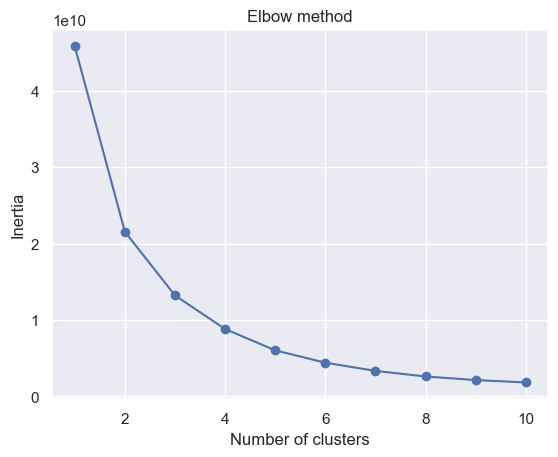

In [22]:
from sklearn.cluster import KMeans

#data = list(zip(X_train, y_train))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
sample_size, nrows, ncols = X.shape
X_features = X.reshape((sample_size, nrows*ncols))
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / sample_size)


In [2]:
def drawSSEPlot(df, column_indices, n_clusters=8, max_iter=300, tol=1e-04, init='k-means++', n_init=10, algorithm='auto'):
    import matplotlib.pyplot as plt
    inertia_values = []
    for i in range(1, n_clusters+1):
        km = KMeans(n_clusters=i, max_iter=max_iter, tol=tol, init=init, n_init=n_init, random_state=1, algorithm=algorithm)
        km.fit_predict(df.iloc[:, column_indices])
        inertia_values.append(km.inertia_)
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(range(1, n_clusters+1), inertia_values, color='red')
    plt.xlabel('No. of Clusters', fontsize=15)
    plt.ylabel('SSE / Inertia', fontsize=15)
    plt.title('SSE / Inertia vs No. Of Clusters', fontsize=15)
    plt.grid()
    plt.show()

In [ ]:
def purity(cluster, labels, k, label_set):
    p = np.zeros((k, len(label_set)))
    purity = 0
    for i in range(len(cluster)):
        p[int(cluster[i]), label_set.index(labels[i])] += 1

    purity = sum(np.max(p, axis=1))/len(labels)

    return purity

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
 
df = pd.DataFrame(X)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['target'] = y

In [24]:
def Purity(Cluster,ClassData):
    cSet=[]
    for c in range(0,len(Cluster)):
        isNotSave=True
        for cs in range(0,len(cSet)):
            if(cSet[cs]==Cluster[c]):
                isNotSave=False
                break
        if(isNotSave):
            cSet.append(Cluster[c])
    classSet=[]
    for a in range(0,len(ClassData)):
        isNotSave=True
        for cs in range(0,len(classSet)):
            if(classSet[cs]==ClassData[a]):
                isNotSave=False
                break
        if(isNotSave):
            classSet.append(ClassData[a])
    cCount=[]
    for cs in range(0,len(cSet)):
        classCount=[]
        for c in range (0,len(classSet)):
            classCount.append(0)
        for cl in range(0,len(Cluster)):
            if(cSet[cs]==Cluster[cl]):
                for c in range (0,len(classSet)):
                    if(ClassData[cl]==classSet[c]):
                        classCount[c]+=1
                        break;
        cCount.append(classCount)
    rowCount=[]
    maxCount=[]
    for c in range(0,len(cCount)):
        rowCount.append(0)
        maxCount.append(0)
    sumCount=0
    for c in range(0,len(cCount)):
        for r in range(0,len(cCount[c])):
            rowCount[c]+=cCount[c][r]
            sumCount+=cCount[c][r]
            if(maxCount[c]<cCount[c][r]):
                maxCount[c]=cCount[c][r]
    
    avg=0
    for a in range(0,len(rowCount)):
        avg+=(maxCount[a]/rowCount[a])*(rowCount[a]/sumCount)
    return str(avg)

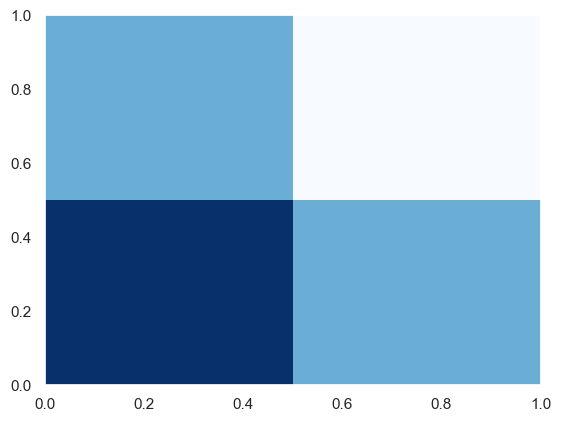

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

label = [0,0,1,0,1,0,0,1]
pred = [0,0,0,0,0,1,1,1]
bins = np.array([0,0.5,1]) # 表示x,y轴每个 bin 的坐标范围
tn, fp, fn, tp = plt.hist2d(label, pred, bins=bins, cmap='Blues')[0].flatten() # flatten 按列展开

In [ ]:
from sklearn.mixture import GMM

# X is a 1000 x 2 array (1000 samples of 2 coordinates).
# It is actually a 2 dimensional PCA projection of data
# extracted from the MNIST dataset, but this random array
# is equivalent as far as the code is concerned.
#X = np.random.rand(1000, 2)

clusterer = (3)
clusterer.fit(X_train)
cluster_labels = clusterer.predict(X_train)

# Now I can count the labels for each cluster..
count0 = list(cluster_labels).count(0)
count1 = list(cluster_labels).count(1)
count2 = list(cluster_labels).count(2)

ImportError: cannot import name 'GMM' from 'sklearn.mixture' (c:\Users\sc121\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\mixture\__init__.py)

In [ ]:
plt.scatter(X_train[:,0],X_train[:,1],c=train)

InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#X, _ = make_blobs(n_samples = 300, centers = 2, cluster_std = 0.6, random_state = 0)

plt.xlabel('x')
plt.ylabel('y')

kmeans = KMeans(n_clusters = 3)   # 分兩群
kmeans.fit(X_train)                     
centers = kmeans.cluster_centers_ # 群心
y_kmeans = kmeans.predict(X_train)      # 分群

plt.scatter(
    X_train[:,0], X_train[:,1], 
    c = y_kmeans,         # 指定標記
    edgecolor = 'none',   # 無邊框
    alpha = 0.5           # 不透明度
)

plt.scatter(centers[:, 0], centers[:, 1], marker = 'x')
plt.show() 

InvalidIndexError: (slice(None, None, None), 0)

In [ ]:
#Three lines to make our compiler able to draw:
import sys
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



#data = list(zip(X_train, y_train ))

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

plt.scatter(X_train,  c=kmeans.labels_)
plt.show()

#Two  lines to make our compiler able to draw:
plt.savefig(sys.stdout.buffer)
sys.stdout.flush()


TypeError: scatter() missing 1 required positional argument: 'y'

In [ ]:
from sklearn import cluster, datasets

# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# KMeans 演算法
kmeans_fit = cluster.KMeans(n_clusters = 3).fit(X_train)

# 印出分群結果
cluster_labels = kmeans_fit.labels_
print("分群結果：")
print(cluster_labels)
print("---")

# 印出品種看看
iris_y = X_train.target
print("真實品種：")
print(iris_y)

分群結果：
[0 2 0 ... 0 0 0]
---


AttributeError: 'DataFrame' object has no attribute 'target'

In [ ]:
#from tkinter import Y


#feature_cols = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration',	'BounceRates','ExitRates','PageValues',	'SpecialDay','OperatingSystems','Browser','Region', 
#'TrafficType','Month','VisitorType_New_Visitor','VisitorType_Other','VisitorType_Returning_Visitor','Weekend_True','Revenue_True']
#X = df8[feature_cols] # Features
#Y=df8.Revenue_True
#Y

In [ ]:
#print(X)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
clusters = 3
k_range = range(2, clusters + 1)
distortions = []
scores = []

kmeans = KMeans(n_clusters=selected_K).fit(X_train)
new_dy = kmeans.predict(X_train)
new_dy

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# k = 1~9 做9次kmeans, 並將每次結果的inertia收集在一個list裡
kmeans_list = [KMeans(n_clusters=k, random_state=46).fit(df6)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_list]
print(inertias)

[45809197529.52752, 21549403679.437077, 13215046451.141336, 8819552794.220673, 6028056290.798663, 4414260514.348122, 3323584362.4020596, 2603470869.2461677, 2133827290.8472748]


KeyError: 0

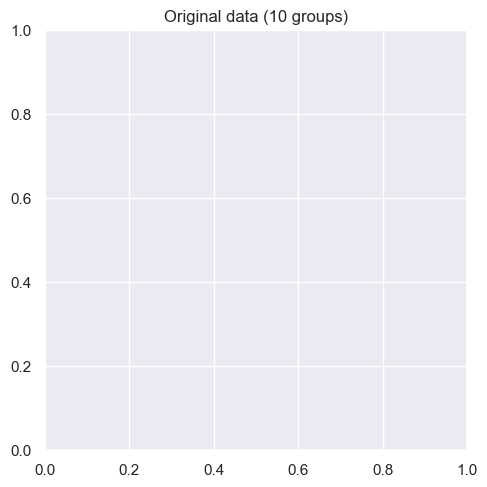

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
colors = ['red', 'orange', 'yellow', 'green', 'cyan',
          'blue', 'purple', 'brown', 'grey', 'black']
# 產生的資料組數 (10)
clusters = 10
# K 值的範圍 (2~10)
k_range = range(2, clusters + 1)
distortions = []
scores = []
# 記錄每種 K 值建出的 KMeans 模型的成效
for i in k_range:
    kmeans = KMeans(n_clusters=i).fit(X_train)
    distortions.append(kmeans.inertia_) # 誤差平方和 (SSE)
    scores.append(silhouette_score(X_train, kmeans.predict(X_train))) # 側影係數
# 找出最大的側影係數來決定 K 值
selected_K = scores.index(max(scores)) + 2
# 重新建立 KMeans 模型並預測目標值
kmeans = KMeans(n_clusters=selected_K).fit(X_train)
new_dy = kmeans.predict(X_train)
# 新分組的資料中心點
centers = kmeans.cluster_centers_
plt.rcParams['font.size'] = 12
plt.figure(figsize=(12, 12))
# 原始資料分組
plt.subplot(221)
plt.title(f'Original data ({clusters} groups)')
plt.scatter(X_train.T[0], X_train.T[1], c=y_train, cmap=plt.cm.Set1)
# 新資料分組
plt.subplot(222)
plt.title(f'KMeans={selected_K} groups')
plt.scatter(X_train.T[0], X_train.T[1], c=new_dy, cmap=plt.cm.Set3)
plt.scatter(centers.T[0], centers.T[1], marker='^', color='orange')
for i in range(centers.shape[0]): # 標上各分組中心點
    plt.text(centers.T[0][i], centers.T[1][i], str(i + 1),
             fontdict={'color': 'red', 'weight': 'bold', 'size': 24})
# 繪製誤差平方和圖 (手肘法)
plt.subplot(223)
plt.title('SSE (elbow method)')
plt.plot(k_range, distortions)
plt.plot(selected_K, distortions[selected_K - 2], 'go') # 最佳解
# 繪製係數圖
plt.subplot(224)
plt.title('Silhouette score')
plt.plot(k_range, scores)
plt.plot(selected_K, scores[selected_K - 2], 'go') # 最佳解
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [ ]:
from sklearn.cluster import KMeans

kmeansModel = KMeans(n_clusters=3, random_state=46)
clusters_pred = kmeansModel.fit_predict(df6)
clusters_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(df6, model.labels_)
                     for model in kmeans_list[1:]]

In [ ]:
kmeansModel.inertia_

13214917187.377195

In [ ]:
kmeansModel.cluster_centers_

array([[1.81983048e+00, 6.20411902e+01, 3.27321112e-01, 1.99689101e+01,
        1.86068401e+01, 5.76336049e+02, 2.54575863e-02, 4.77207609e-02,
        5.49487216e+00, 6.41435048e-02, 2.12073724e+00, 2.36743544e+00,
        3.16903213e+00, 4.14902425e+00, 3.53834023e-02, 1.44096196e-01,
        1.72481766e-02, 3.43977922e-02, 2.41474473e-02, 1.69229253e-01,
        2.85137000e-01, 2.08949340e-01, 4.42538932e-02, 3.71575005e-02,
        1.57500493e-01, 7.88488074e-03, 8.34614626e-01, 2.34870885e-01,
        1.32170313e-01],
       [7.43961353e+00, 2.95364891e+02, 2.74879227e+00, 2.66723094e+02,
        2.36106280e+02, 1.08861744e+04, 5.93975560e-03, 1.96883098e-02,
        4.52137028e+00, 3.09178744e-02, 2.14975845e+00, 2.30917874e+00,
        2.58454106e+00, 3.61835749e+00, 3.86473430e-02, 8.69565217e-02,
        1.73472348e-18, 5.31400966e-02, 4.34782609e-02, 4.34782609e-02,
        1.06280193e-01, 5.60386473e-01, 2.41545894e-02, 4.34782609e-02,
        4.83091787e-03, 4.83091787e-03,

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# 隨機產生 10 組 2 features 的資料 500 筆 (dy 即原始目標值 label 0~9)

# 用 KMeans 在資料中找出 5 個分組
kmeans = KMeans(n_clusters=3)
kmeans.fit(df8)
# 預測新的目標值 label
new_dy = kmeans.predict(df8)
new_dy

array([0, 0, 0, ..., 0, 0, 0])